In [469]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [470]:
data = pd.read_csv('task_d.csv')

In [471]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [472]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### We will use Logistic Regression
<pre>
To:
1. <b>Find the Correlation between the features</b>
2. <b>Find the best model for the given data</b>
3. <b>Get the weights with the original data</b>

We will also modify the data and check the following:
<b>Modify original data</b>
a. Add a noise(order of 10^-2) to each element of X 
and get the new data set X' (X' = X + e)
b. Train the same 'best_model' with data (X', Y)
c. Check the accuracy of the model 'best_model_accuracy_edited'
d. Get the weights W' using best_model.coef_
    
<b>Checking deviations in metric and weights </b>
a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
b. find the absolute change between each value of W and W' ==> |(W-W')|
c. print the top 4 features which have higher % change in weights 
compare to the other feature

</pre>

#### We will use Linear SVM

<pre>
To do the same steps (2, 3, 4, 5) we have done above in logistic regression.
</pre>

<strong>At the end we will write the observations based on the results we get from the deviations of weights in both Logistic Regression and linear SVM</strong>

## Logistic Regression

#### Finding the correlation between the features

In [473]:
# check the correlation between the features
data.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


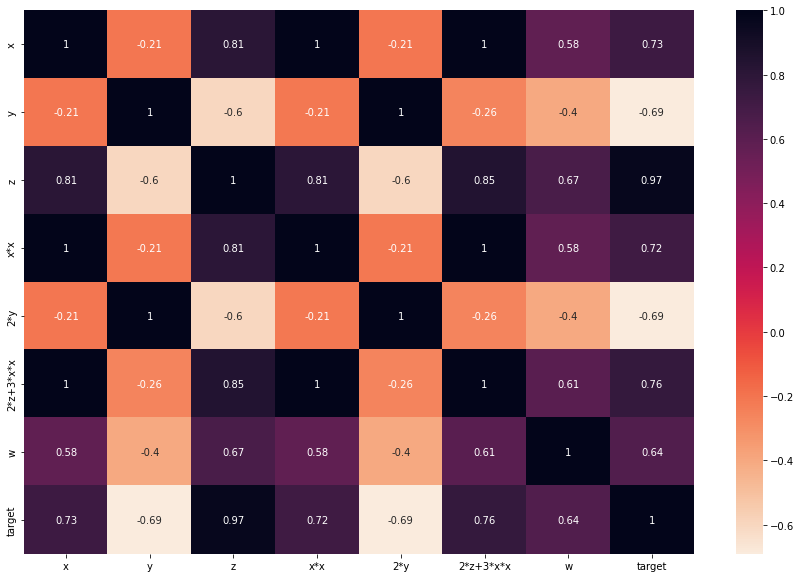

In [474]:
# plot heat map of correlation matrix using seaborn heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='rocket_r')
plt.show()

#### Finding the best model for the given data

In [475]:
# Train Logistic regression on data(X,Y) that we have created in the above cell
clf = LogisticRegression(random_state=42)

In [476]:
# Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation
cv = KFold(n_splits=5)
params = {'C': np.logspace(-4, 4, 5)}

grid_search = GridSearchCV(clf, param_grid=params, n_jobs=-1, cv=cv)

grid_search.fit(X, Y)
grid_search.best_params_

{'C': 1.0}

In [477]:
# Create a new Logistic regression with the best alpha
best_model = LogisticRegression(C=1.0, random_state=42)

#### Getting the weights with the original data

In [478]:
# train the 'best_model' with X, Y
best_model.fit(X, Y)

LogisticRegression(random_state=42)

In [479]:
# Check the accuracy of the model 'best_model_accuracy'
best_model_accuracy = best_model.score(X, Y)
print("The accuracy of the model is :", best_model_accuracy)

The accuracy of the model is : 1.0


In [480]:
# Get the weights W using best_model.coef_
best_model_weights = best_model.coef_
print("weights W :", best_model_weights)

weights W : [[ 0.72298832 -0.90354834  1.68256456  0.66730582 -0.90354834  0.80372108
   0.5096727 ]]


#### Modifying original data

In [481]:
# a. Add a noise(order of 10^-2) to each element of X 
# and get the new data set X' (X' = X + e)
# code source: https://www.adamsmith.haus/python/answers/how-to-add-noise-to-a-signal-using-numpy-in-python
noise = np.random.normal(0, 10**-2, X.shape)
X_dash = X + noise

In [482]:
# b. Train the same 'best_model' with data (X', Y)
best_model.fit(X_dash, Y)

LogisticRegression(random_state=42)

In [483]:
# c. Check the accuracy of the model 'best_model_accuracy_edited'
best_model_accuracy_edited = best_model.score(X_dash, Y)
print("The accuracy of the model is :", best_model_accuracy_edited)

The accuracy of the model is : 1.0


In [484]:
# d. Get the weights W' using best_model.coef_
best_model_weights_edited = best_model.coef_
print("weights W :", best_model_weights_edited)

weights W : [[ 0.72622331 -0.90664777  1.68285536  0.66723424 -0.90191569  0.79728017
   0.51406023]]


#### Checking deviations in metrics and weights

In [485]:
# a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
acc_diff = best_model_accuracy_edited - best_model_accuracy
print("Difference between 'best_model_accuracy_edited' and 'best_model_accuracy' :", acc_diff)

Difference between 'best_model_accuracy_edited' and 'best_model_accuracy' : 0.0


In [486]:
# b. find the absolute change between each value of W and W' ==> |(W-W')|
abs_diff_weights = abs(best_model_weights - best_model_weights_edited)
print("Absolute change between 'best_model_weights' and 'best_model_weights_edited' :", abs_diff_weights)

Absolute change between 'best_model_weights' and 'best_model_weights_edited' : [[3.23498948e-03 3.09942028e-03 2.90797034e-04 7.15815206e-05
  1.63265866e-03 6.44090912e-03 4.38753096e-03]]


In [487]:
# c. print the top 4 features which have higher % change in weights 
# compare to the other feature
abs_weight_percent_diff = abs(best_model_weights - best_model_weights_edited)*100
print("Features according to % change in weights :", abs_weight_percent_diff)

# Top 4 feature accoring to % change in weights
top_4_index = np.argsort(-abs_weight_percent_diff)[::-1,:4]
print("\nTop 4 features index :", top_4_index)
print("Top 4 features :", data.columns[top_4_index])

Features according to % change in weights : [[0.32349895 0.30994203 0.0290797  0.00715815 0.16326587 0.64409091
  0.4387531 ]]

Top 4 features index : [[5 6 0 1]]
Top 4 features : [['2*z+3*x*x' 'w' 'x' 'y']]


## LinearSVM

#### Finding the best model for the given data

In [488]:
# Train Linear SVM on data(X,Y) that we have created in the above cell
clf = LinearSVC(random_state=42)

In [489]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [490]:
# Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation
cv = KFold(n_splits=5)
params = {'C': np.logspace(-4, 4, 5)}

grid_search = GridSearchCV(clf, param_grid=params, n_jobs=-1, cv=cv)

grid_search.fit(X, Y)
grid_search.best_params_

{'C': 0.0001}

In [491]:
# Create a new Linear SVM with the best alpha
best_model_svm = LinearSVC(C=0.0001)

#### Getting the weights with the original data

In [492]:
# train the 'best_model' with X, Y
best_model_svm.fit(X, Y)

LinearSVC(C=0.0001)

In [493]:
# Check the accuracy of the model 'best_model_accuracy'
best_model_accuracy_svm = best_model_svm.score(X, Y)
print("The accuracy of the model is :", best_model_accuracy)

The accuracy of the model is : 1.0


In [494]:
# Get the weights W using best_model.coef_
best_model_weights_svm = best_model_svm.coef_
print("weights W :", best_model_weights_svm)

weights W : [[ 0.01323056 -0.01280974  0.01791372  0.01305589 -0.01280974  0.01391318
   0.01167827]]


#### Modifying original data

In [495]:
# b. Train the same 'best_model' with data (X', Y)
best_model_svm.fit(X_dash, Y)

LinearSVC(C=0.0001)

In [496]:
# c. Check the accuracy of the model 'best_model_accuracy_edited'
best_model_accuracy_edited_svm = best_model_svm.score(X_dash, Y)
print("The accuracy of the model is :", best_model_accuracy_edited)

The accuracy of the model is : 1.0


In [497]:
# d. Get the weights W' using best_model.coef_
best_model_weights_edited_svm = best_model_svm.coef_
print("weights W :", best_model_weights_edited_svm)

weights W : [[ 0.01324292 -0.01280483  0.01789301  0.01305779 -0.01278639  0.01390916
   0.01169797]]


#### Checking deviations in metrics and weights

In [498]:
# a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
acc_diff_svm = best_model_accuracy_edited_svm - best_model_accuracy_svm
print("Difference between 'best_model_accuracy_edited' and 'best_model_accuracy' :", acc_diff_svm)

Difference between 'best_model_accuracy_edited' and 'best_model_accuracy' : 0.0


In [499]:
# b. find the absolute change between each value of W and W' ==> |(W-W')|
abs_weight_diff_svm = abs(best_model_weights_svm - best_model_weights_edited_svm)
print("Absolute change between 'best_model_weights' and 'best_model_weights_edited' :", abs_weight_diff_svm)

Absolute change between 'best_model_weights' and 'best_model_weights_edited' : [[1.23596239e-05 4.90347432e-06 2.07125474e-05 1.89733477e-06
  2.33474891e-05 4.02046084e-06 1.96990245e-05]]


In [500]:
# c. print the top 4 features which have higher % change in weights 
# compare to the other feature

weight_diff_percent_svm = abs_weight_diff_svm*100
print("Feature according to % change in weights :", weight_diff_percent_svm)

# Top 4 features of SVM
top_4_index_svm = np.argsort(-(weight_diff_percent_svm))[::-1,:4]
print("\nTop 4 features index :", top_4_index_svm)
print("Top 4 features :", data.columns[top_4_index_svm])

Feature according to % change in weights : [[0.00123596 0.00049035 0.00207125 0.00018973 0.00233475 0.00040205
  0.0019699 ]]

Top 4 features index : [[4 2 6 0]]
Top 4 features : [['2*y' 'z' 'w' 'x']]


### Observation:
- Adding noise to LogisticRegression or LinearSVC model doesn't seem to affect its performance.
- Both model have different top 4 features every runtime. Added noise seems to affect correlation of features.